<a href="https://colab.research.google.com/github/MaulanaJauhar/PCVK/blob/main/Week11/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modul 10 - Object Detection
##Kelompok 8



*   Aido Luthfi Al Hakim **(6 | 2141720136)**
*   Jauhar Maulana A'la  **(14 | 2141720186)**
*   Naufal Falah Wafiuddin **(23 | 2141720129)**


##Tugas Praktikum

###1. Import Library dan Google Drive

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

###2. Implementasi 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya

#####a. TM_SQDIFF
#####b. TM_SQDIFF_NORMED
#####c. TM_CCORR
#####d. TM_CCORR_NORMED
#####e. TM_CCOEFF
#####f. TM_CCOEFF_NORMED

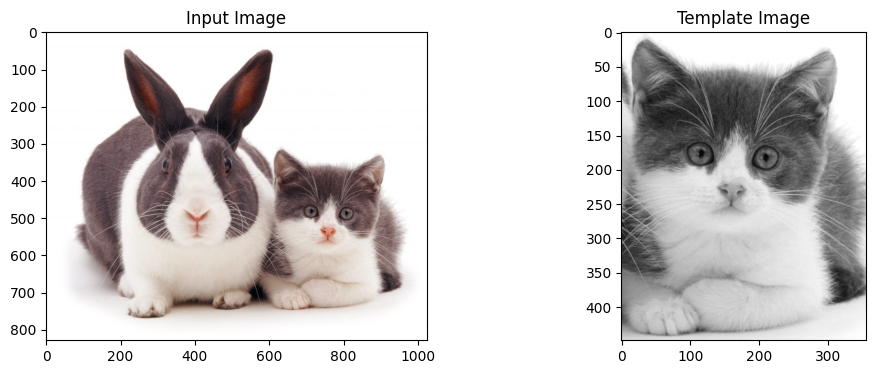

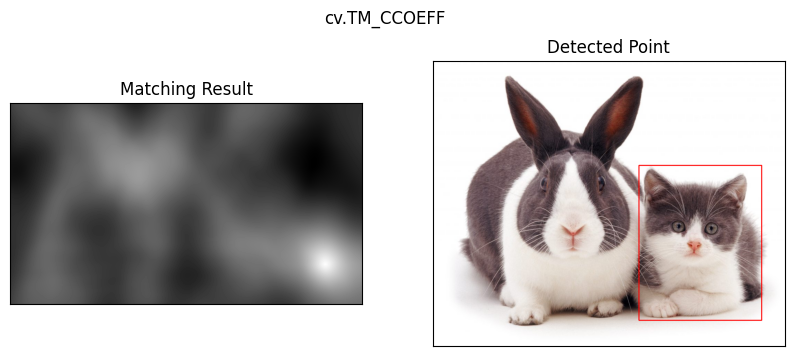

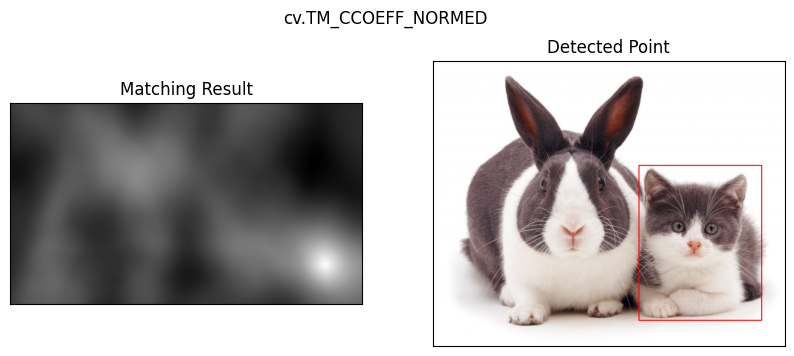

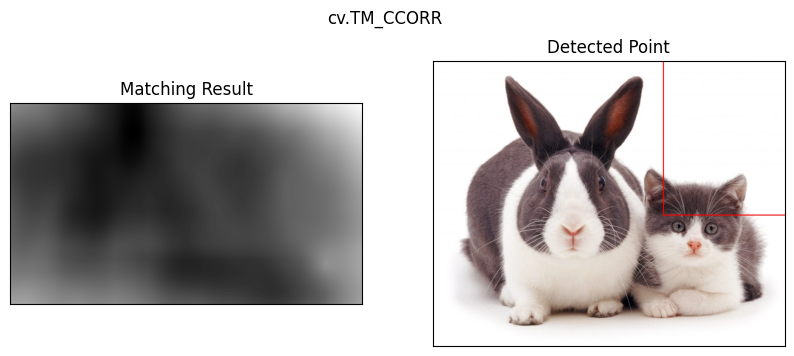

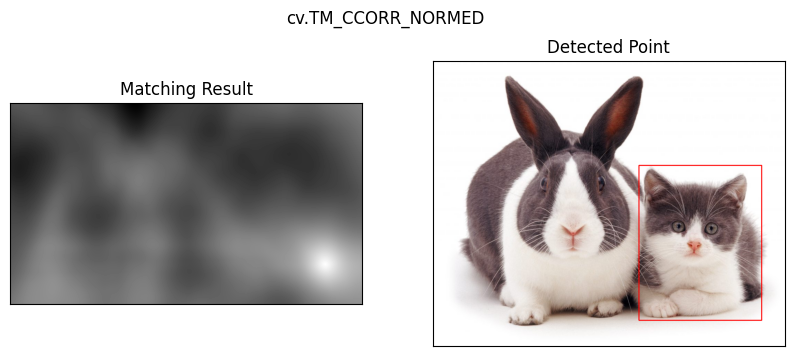

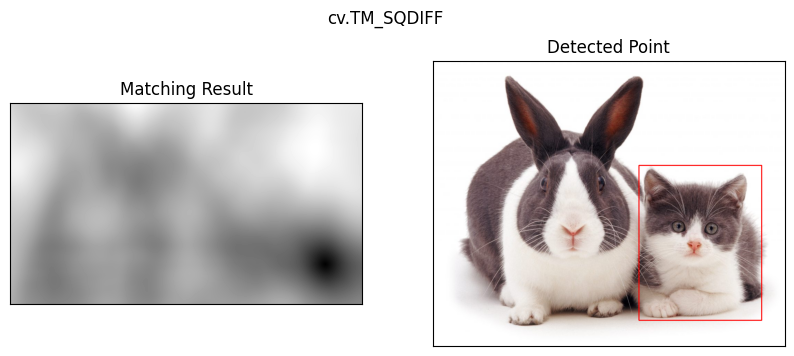

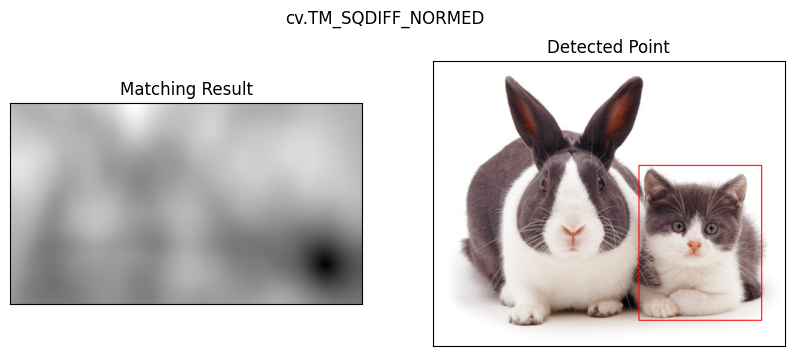

In [164]:
# Load the image and the template in color
image = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/cat2_templatejpg.jpg')

# Convert the image and template to grayscale for template matching
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Store width and height of template in w and h
w, h = template_gray.shape[::-1]

# List to store all the methods available in cv for template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(122)
plt.imshow(template_gray,cmap="gray")
plt.title('Template Image')


for meth in methods:
    img = image.copy()
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(image_gray, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

    plt.figure(figsize=(10,4))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

###3. Implementasi konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template

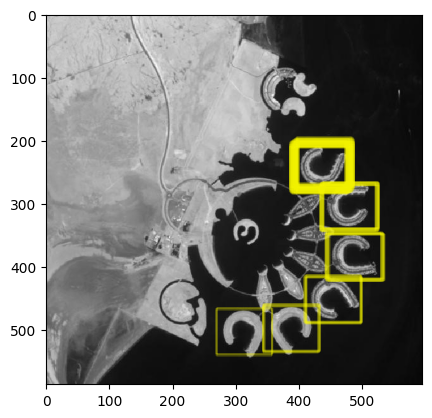

In [172]:
# Load the input image and the template
input_image = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/bahrain.jpg',0)
template = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/bahrain-template.jpg',0)

# library untuk mencocokkan beberapa gambar yang sama
from skimage.feature import match_template

# Hitung kemiripan citra dengan citra template
result = match_template(input_image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45 # menentukan threshold untuk menentukan hasil matc
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(input_image, cmap=plt.cm.gray)
# ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]): # iterasi pada setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

###4. Implementasi metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

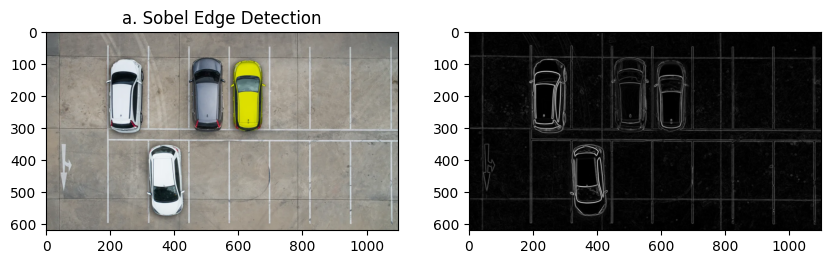

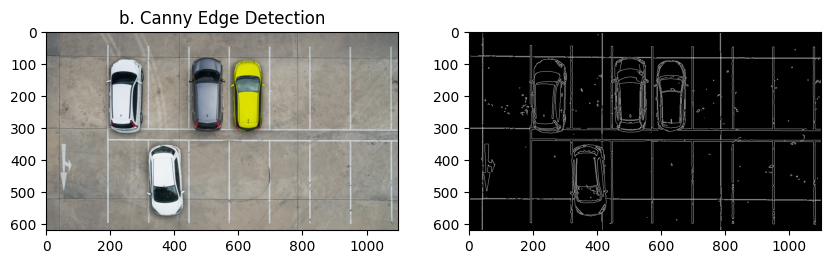

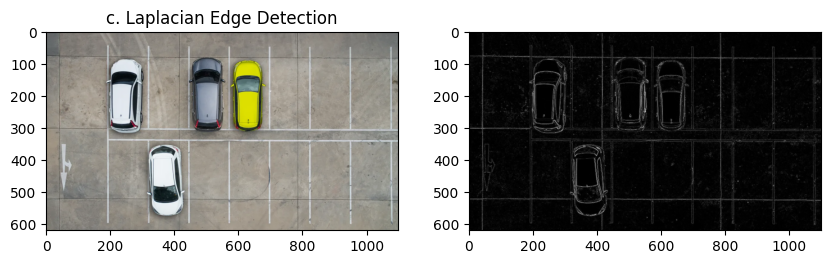

In [174]:
# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/car-park.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=5)
sobel_magnitude = cv.magnitude(sobelx, sobely)

# Apply Canny edge detection
edges = cv.Canny(gray, 100, 200)

# Apply Gaussian blur to reduce noise
# blur = cv.GaussianBlur(gray, (3,3), 0)

# Apply Laplacian edge detection
laplacian = cv.Laplacian(gray, cv.CV_64F)
laplacianFix = cv.convertScaleAbs(laplacian)

# Plot the results
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('a. Sobel Edge Detection')
plt.subplot(122)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('b. Canny Edge Detection')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('c. Laplacian Edge Detection')
plt.subplot(122)
plt.imshow(laplacianFix, cmap='gray')
plt.title('')
plt.show()

###5. Implementasi metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg

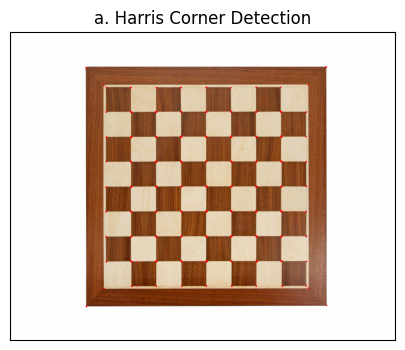

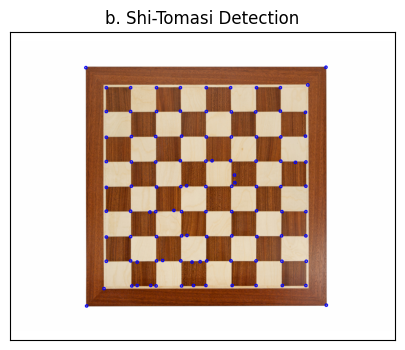

In [175]:
# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')
# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_corners = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Shi-Tomasi Corner Detection
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
image_shi_tomasi = image.copy()
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv.circle(image_shi_tomasi, (int(x), int(y)), 3, 255, 2)

# Display the images
plt.figure(figsize=(10,4))
plt.imshow(cv.cvtColor(image_harris, cv.COLOR_BGR2RGB))
plt.title('a. Harris Corner Detection'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,4))
plt.imshow(cv.cvtColor(image_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title('b. Shi-Tomasi Detection'), plt.xticks([]), plt.yticks([])
plt.show()


###6. Implementasi metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg.

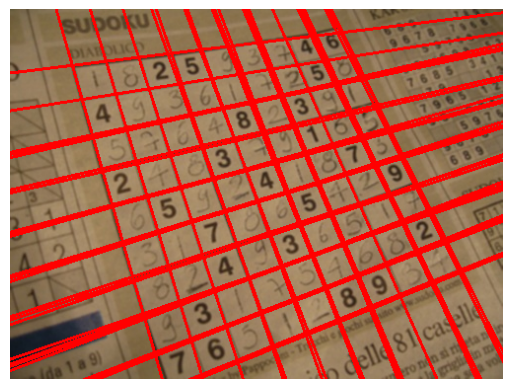

In [168]:
# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg')
# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply edge detection method
edges = cv.Canny(gray, 60, 220, apertureSize=3)

# Apply Hough Transform
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

# Iterate over the output lines and draw them
for rho, theta in lines[:,0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


###7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg

Text(0.5, 1.0, 'Contour Detectection')

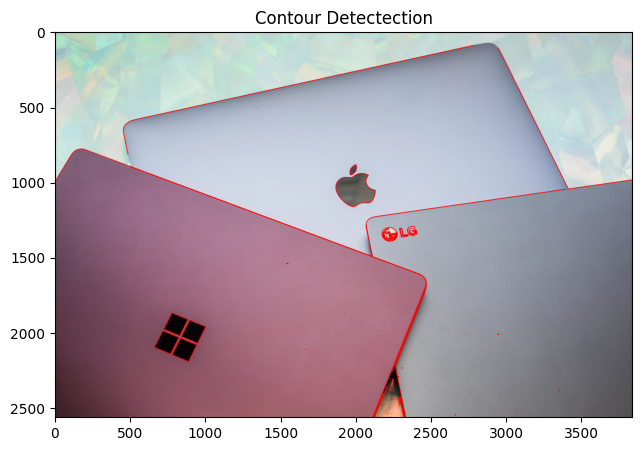

In [171]:
# Load the input image
img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv.Canny(gray, 50, 200, apertureSize=3)

# Find contours
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw contours
cv.drawContours(img, contours, -1, (0, 0, 255), 3)

# Display the input image with the detected contours
plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Contour Detectection')

##Pengayaan Materi KTP

####1. Import Library

In [183]:
import cv2
import os

####2. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori

In [184]:
# Lokasi hasil pelat
path_plate = '/content/drive/MyDrive/PCVK/KTP_More/'

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, 'ktp4.png'))
 blurred = src.copy()
 gray = blurred.copy()


####4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [185]:
# Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

####5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra

168.0 (300, 493)


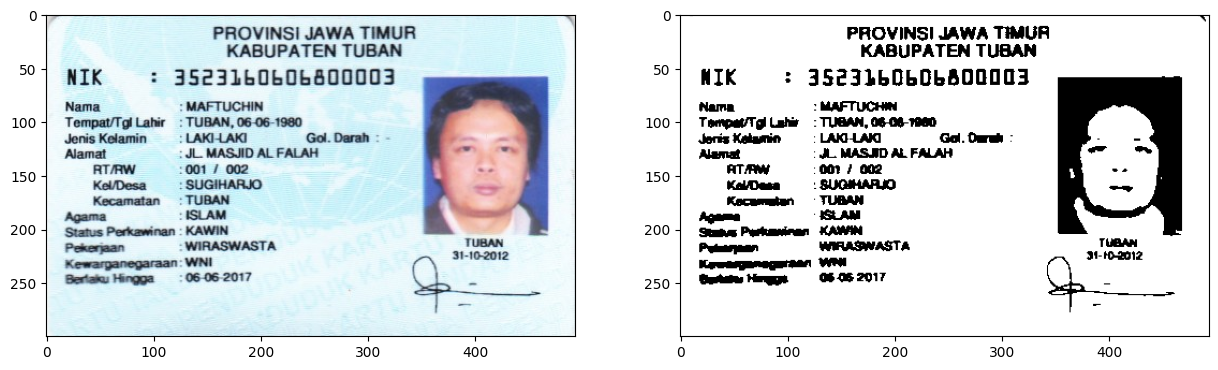

In [186]:
# Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

####6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan

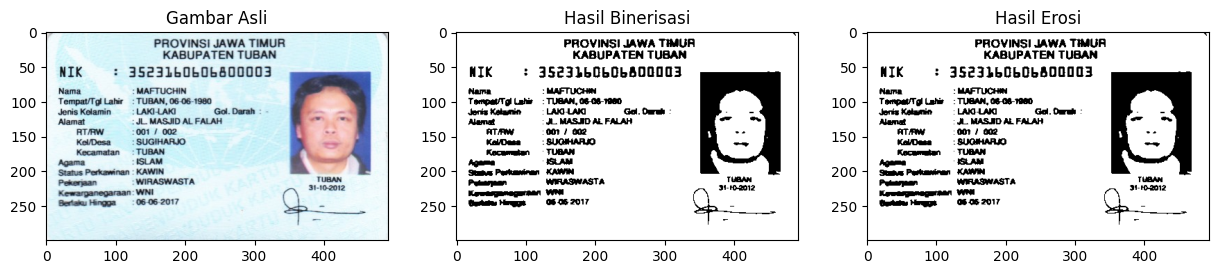

In [187]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

####7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.

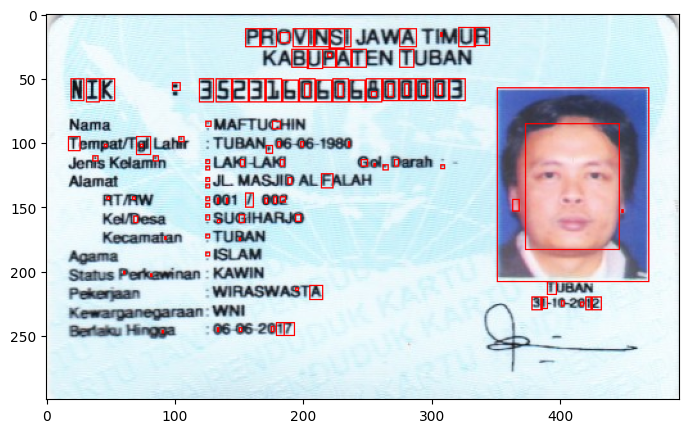

In [190]:
# Load the input image
path = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')

blurred = cv2.GaussianBlur(path, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(path, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(path, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(path, cv2.COLOR_BGR2RGB))

##Tugas Praktikum

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah.

Kelompok - KTP Arief Wijaya Cimahi

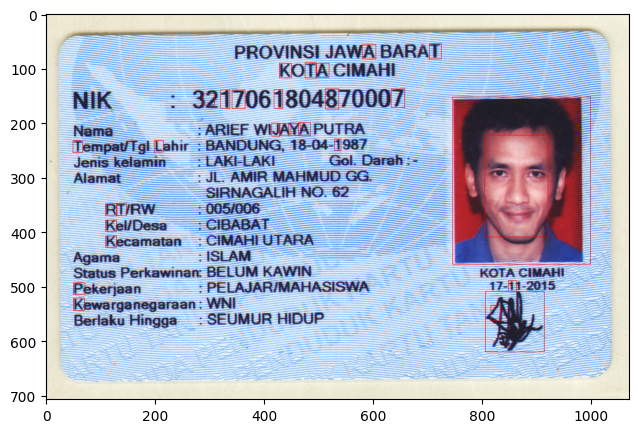

In [192]:
path = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp2.png')
blurred = cv2.GaussianBlur(path, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(path, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(path, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(path, cv2.COLOR_BGR2RGB))